# 平行进口汽车行业调研报告

In [30]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from lxml import etree
import time

## 汽车品牌名录

In [41]:
brand_url = 'http://www.autohome.com.cn/grade/carhtml/%s.html'
brand_xpath = '//dt/div/a/text()'
chars = [chr(i) for i in range(65, 91)]

In [45]:
brands = []
for alphabeta in chars:
    url = brand_url % alphabeta
    req = requests.get(url)
    if req.status_code == 200:
        tree = etree.HTML(req.text)
        if tree is not  None:
            brands = brands + tree.xpath(brand_xpath)
    time.sleep(2)

In [46]:
print(brands)

['奥迪', '阿斯顿・马丁', 'AC Schnitzer', '安凯客车', '阿尔法・罗密欧', 'ALPINA', 'ARCFOX', 'Arash', '艾康尼克', '奔驰', '本田', '宝马', '别克', '比亚迪', '宝骏', '标致', '保时捷', '北汽幻速', '北京', '北汽绅宝', '宝沃', '宾利', '奔腾', '北汽新能源', '北汽制造', '北汽威旺', '巴博斯', '布加迪', '比速汽车', '北汽道达', '长安', '长城', '长安欧尚', '昌河', '成功汽车', '长安跨越', '长安轻型车', 'Caterham', '长江EV', '大众', '东风', '东风风行', 'DS', '东风风神', '东风风光', '东南', '东风小康', '道奇', '东风风度', 'Dacia', 'DMC', '大发', '丰田', '福特', '法拉利', '福田', '菲亚特', '福迪', '福汽启腾', '福田乘用车', 'Faraday Future', 'Fisker', '广汽传祺', '观致', 'GMC', '广汽吉奥', 'GLM', 'Gumpert', '光冈', '哈弗', '海马', '黄海', '红旗', '华颂', '华泰新能源', '哈飞', '华凯', '海格', '恒天', '华泰', '汉腾汽车', '华骐', 'Hennessey', '悍马', '华利', '华普', '霍顿', 'Icona', '吉利汽车', 'Jeep', '江淮', '捷豹', '金杯', '江铃', '江铃集团轻汽', '金龙', '九龙', '金旅', '江铃集团新能源', '凯迪拉克', '克莱斯勒', '开瑞', 'KTM', '凯翼', '科尼赛克', '卡威', '卡尔森', '凯佰赫', '雷克萨斯', '路虎', '铃木', '雷诺', '林肯', '猎豹汽车', '劳斯莱斯', '兰博基尼', '陆风', '力帆汽车', '路特斯', '莲花汽车', '理念', 'LeSEE', '蓝旗亚', '朗世', '领克', '领志', '马自达', '名爵', '玛莎拉蒂', 'MINI', '迈凯伦', '摩根', '迈巴赫', '纳智捷', '南京金龙', 'nanoFL

根据汽车之家的品牌选车, 目前中国市场在售品牌共有208个.

## 车金宝平行进口车名录

In [2]:
import pandas as pd

In [2]:
cars = pd.read_csv('chejinbao_cars.csv')

In [3]:
cars.head()

,name,displacement,price,sale_type,version,fuel_type,model,chejinbao_id
0,奥迪,3.0L,67.5,现车,美规,汽油,SUV,154
1,宾利飞驰,4.0L,260.0,现车,美规,汽油,轿车,143
2,F-PACE 2.0T都市尊享版,2.0L,54.8,期车,NaN,汽油,SUV,158
3,大切诺基,3.0L,57.99,现车,美规,汽油,SUV,139
4,加版XC90,2.0L,63.5,现车,加版,汽油,SUV,202


In [4]:
cars['model'].value_counts()

SUV    136
跑车      18
MPV     11
轿车       8
皮卡       6
房车       1
Name: model, dtype: int64

车金宝上的销售主要以SUV为主, 比例高达74.7%.

In [5]:
cars['fuel_type'].value_counts()

汽油    154
柴油      3
电力      2
Name: fuel_type, dtype: int64

受限于排放标准和行驶标准的不同, 车金宝上的平行进口车仍然以汽油车为主, 柴油和新能源汽车比例很小.

In [6]:
cars['displacement'].value_counts()

3.0L     56
2.7L     28
4.0L     25
2.0L     21
3.5L     13
5.7L      7
3.6L      7
2.3L      7
6.2L      3
1.3L      2
5.0L      2
0.0L      2
5.3L      2
15.0L     1
1.7L      1
2.8L      1
5.6L      1
6.0L      1
4.6L      1
6.6L      1
Name: displacement, dtype: int64

In [9]:
# 将displacement直接清洗为float类型,便于比较
cars['displacement'] = cars['displacement'].apply(lambda x: float(x.replace('L', '')))

AttributeError: 'float' object has no attribute 'replace'

In [10]:
cars['displacement'].value_counts()

3.0     56
2.7     28
4.0     25
2.0     21
3.5     13
5.7      7
3.6      7
2.3      7
6.2      3
5.0      2
0.0      2
1.3      2
5.3      2
6.0      1
1.7      1
15.0     1
4.6      1
5.6      1
6.6      1
2.8      1
Name: displacement, dtype: int64

In [13]:
# 按照进口车关税分类, 区分开3.0L以上和以下的数量
cars[cars['displacement']<3.0].count()

name            62
displacement    62
price           62
sale_type       62
version         57
fuel_type       62
model           60
chejinbao_id    62
dtype: int64

排量在3.0L以下的平行进口车有62辆, 占比只有34%.

In [14]:
cars['sale_type'].value_counts()

现车    148
期车     34
Name: sale_type, dtype: int64

车金宝上的平行进口车是现车的数量为148, 占比高达81.3%

In [15]:
cars['version'].value_counts()

中东    65
美规    41
欧规    35
加版    29
墨版     2
Name: version, dtype: int64

可以看到, 中东版和美规的数量高达106个, 占比达到了58.2%. 而这两个地区的车辆价格相对较低. 价格成为了主要市场的主要驱动力.

## 汽车之家车商城平行进口车数据

In [3]:
autohome_cars = pd.read_csv('autohome_cars.csv')

In [7]:
autohome_cars.head(20)

,spec_id,price,item_id,name,official_price,brand,level,engine
0,11000264,NaN,372013,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油
1,11000316,NaN,256992,2017款 2.3T美规自动挡标配,400000,福特(进口),跑车,2.3T 314马力 L4
2,11000336,NaN,286370,2017款中东版兰德酷路泽4.0,898000,美国洛杉矶汽车改装有限公司,中大型SUV,1GR
3,11000095,NaN,313419,2017款 4.0L 低配中东版,565000,日产(进口),大型SUV,4.0L 269马力 V6
4,11000095,NaN,284302,2017款 4.0L 低配中东版,565000,日产(进口),大型SUV,4.0L 269马力 V6
5,11000095,NaN,288156,2017款 4.0L 低配中东版,565000,日产(进口),大型SUV,4.0L 269马力 V6
6,11000320,NaN,259507,2017款平行进口宝马X6M,1298000,宝马（进口）,中大型SUV,3.0T 306马力V6
7,11000326,NaN,295279,2016款 汽油4.0L 丰田兰德酷路泽 中东版,85.8万,丰田,中大型车,4.0L
8,11000337,NaN,373090,2017款 汽油2.7L 丰田普拉多 中东版,41.88万,丰田,中大型车,2.7L
9,11000093,NaN,373148,2017款 4.0L SE中东版,695000,日产(进口),大型SUV,4.0L 269马力 V6


In [30]:
autohome_cars[autohome_cars['name'].apply(lambda x: '加规' not in x) & autohome_cars['name'].apply(lambda x: '中东版' not in x) &autohome_cars['name'].apply(lambda x: '美规' not in x) & autohome_cars['name'].apply(lambda x: '美版' not in x) & autohome_cars['name'].apply(lambda x: '欧规' not in x) & autohome_cars['name'].apply(lambda x: '欧版' not in x) & autohome_cars['name'].apply(lambda x: '加版' not in x)]

,spec_id,price,item_id,name,official_price,brand,level,engine
0,11000264,NaN,372013,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油
6,11000320,NaN,259507,2017款平行进口宝马X6M,1298000,宝马（进口）,中大型SUV,3.0T 306马力V6
14,11000264,NaN,284026,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油
15,11000264,NaN,156447,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油
21,11000258,NaN,271437,2016款 宝马 X6 xDrive35i,113.8万,宝马(进口),大型SUV,3.0T 306马力 L6
22,11000258,NaN,256938,2016款 宝马 X6 xDrive35i,113.8万,宝马(进口),大型SUV,3.0T 306马力 L6
23,11000264,NaN,288214,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油
35,11000292,NaN,294670,沃尔沃XC90 2.0T T6 7座 汽油版,918800,沃尔沃（进口）,中大型SUV,2.0T 320马力 L4
41,11000264,NaN,274175,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油
47,11000264,NaN,285175,奔驰GLS450 2017款 3.0T汽油版,134.3万,奔驰,大型SUV,3.0T 汽油


In [32]:
autohome_cars[autohome_cars['name'].apply(lambda x: '黎巴嫩' in x)].count()

spec_id           40
price              0
item_id           40
name              40
official_price    40
brand             40
level             40
engine            40
dtype: int64

# [中国海关总署公开数据](http://www.customs.gov.cn/)

## 2014年汽车进口总量

In [17]:
import_cars_2014_2017 = {
    '2014': {
        '总量': 0,
        '轿车': 469641,
        'SUV': 589017,
        '小客车': 344199,
        '货车': 9590,
        '非公路用自卸车': 107,
        '专用汽车': 298,
        '30座以上客车': 68,
        '10至29座客车': 963,
        '装有引擎的汽车底盘': 1455
    },
    '2015': {
        '总量': 0,
        '轿车': 352461,
        'SUV': 471757,
        '小客车': 264332,
        '货车': 4883,
        '非公路用自卸车': 39,
        '专用汽车': 211,
        '30座以上客车': 63,
        '10至29座客车': 836,
        '装有引擎的汽车底盘': 2208
    },
    '2016': {
        '总量': 0,
        '轿车': 377373,
        'SUV': 465739,
        '小客车': 206190,
        '货车': 7694,
        '非公路用自卸车': 27,
        '专用汽车': 179,
        '30座以上客车': 14,
        '10至29座客车': 723,
        '装有引擎的汽车底盘': 1937
    },
    '2017.6': {
        '总量': 0,
        '轿车': 216751,
        'SUV': 254788,
        '小客车': 106276,
        '货车': 6257,
        '非公路用自卸车': 3,
        '专用汽车': 85,
        '30座以上客车': 13,
        '10至29座客车': 343,
        '装有引擎的汽车底盘': 771
    },
    '2017.9': {
        '总量': 0,
        '轿车': 339332,
        'SUV': 397144,
        '小客车': 161399,
        '货车': 7952,
        '非公路用自卸车': 7,
        '专用汽车': 130,
        '30座以上客车': 19,
        '10至29座客车': 719,
        '装有引擎的汽车底盘': 1087
    }
}

In [18]:
import pandas as pd
import_cars_2014_2017_df = pd.DataFrame(import_cars_2014_2017)

In [19]:
import_cars_2014_2017_df

,2014,2015,2016,2017.6,2017.9
10至29座客车,963,836,723,343,719
30座以上客车,68,63,14,13,19
SUV,589017,471757,465739,254788,397144
专用汽车,298,211,179,85,130
小客车,344199,264332,206190,106276,161399
总量,0,0,0,0,0
装有引擎的汽车底盘,1455,2208,1937,771,1087
货车,9590,4883,7694,6257,7952
轿车,469641,352461,377373,216751,339332
非公路用自卸车,107,39,27,3,7


In [20]:
import_cars_2014_2017_df = import_cars_2014_2017_df.T

In [21]:
import_cars_2014_2017_df['总量'] = import_cars_2014_2017_df.apply(lambda x:x.sum(), axis=1)

In [22]:
import_cars_2014_2017_df

,10至29座客车,30座以上客车,SUV,专用汽车,小客车,总量,装有引擎的汽车底盘,货车,轿车,非公路用自卸车
2014,963,68,589017,298,344199,1415338,1455,9590,469641,107
2015,836,63,471757,211,264332,1096790,2208,4883,352461,39
2016,723,14,465739,179,206190,1059876,1937,7694,377373,27
2017.6,343,13,254788,85,106276,585287,771,6257,216751,3
2017.9,719,19,397144,130,161399,907789,1087,7952,339332,7


In [23]:
import_cars_2014_2017_df['民用车总量'] = import_cars_2014_2017_df['轿车'] + import_cars_2014_2017_df['SUV'] + import_cars_2014_2017_df['小客车']

In [24]:
import_cars_2014_2017_df

,10至29座客车,30座以上客车,SUV,专用汽车,小客车,总量,装有引擎的汽车底盘,货车,轿车,非公路用自卸车,民用车总量
2014,963,68,589017,298,344199,1415338,1455,9590,469641,107,1402857
2015,836,63,471757,211,264332,1096790,2208,4883,352461,39,1088550
2016,723,14,465739,179,206190,1059876,1937,7694,377373,27,1049302
2017.6,343,13,254788,85,106276,585287,771,6257,216751,3,577815
2017.9,719,19,397144,130,161399,907789,1087,7952,339332,7,897875


数据来自中国海关总署,可以看到虽然在2015年和2016年民用车整车进口数量持续下滑, 但是随着2017年1月1日开始实施的关税调整方案和2017年5月11日平行进口车试点范围扩大到9个省市之后, 2017年的汽车进口总量和民用车进口总量预计会实现同比增长.

# 平行进口车数据
[2013年-2016年数据来自万高汽车](http://www.imvango.com/newsDetail.html?id=268)

In [25]:
parallel_import_cars_2014_2017 = {
    '2014': 109566,
    '2015': 114261,
    '2016': 132877,
    '2017.6': 81649
}

In [26]:
parallel_import_cars_2014_2017_series = pd.Series(parallel_import_cars_2014_2017)

In [27]:
parallel_import_cars_2014_2017_series

2014      109566
2015      114261
2016      132877
2017.6     81649
dtype: int64

为了对比数据, 海关总署公布的2017年1至6月的民用车整车进口量如下:

In [28]:
import_cars_2017_1_6 = {
    '轿车': 216751,
    'SUV': 254788,
    '小客车': 106276,
    '民用车总量': 577815
}

In [29]:
import_cars_2014_2017_df['平行进口车'] = parallel_import_cars_2014_2017_series

In [30]:
import_cars_2014_2017_df

,10至29座客车,30座以上客车,SUV,专用汽车,小客车,总量,装有引擎的汽车底盘,货车,轿车,非公路用自卸车,民用车总量,平行进口车
2014,963,68,589017,298,344199,1415338,1455,9590,469641,107,1402857,109566.0
2015,836,63,471757,211,264332,1096790,2208,4883,352461,39,1088550,114261.0
2016,723,14,465739,179,206190,1059876,1937,7694,377373,27,1049302,132877.0
2017.6,343,13,254788,85,106276,585287,771,6257,216751,3,577815,81649.0
2017.9,719,19,397144,130,161399,907789,1087,7952,339332,7,897875,NaN


In [31]:
import_cars_2014_2017_df['平行进口车/民用车进口总量比例'] = import_cars_2014_2017_df['平行进口车']/import_cars_2014_2017_df['民用车总量']

In [32]:
import_cars_2014_2017_df

,10至29座客车,30座以上客车,SUV,专用汽车,小客车,总量,装有引擎的汽车底盘,货车,轿车,非公路用自卸车,民用车总量,平行进口车,平行进口车/民用车进口总量比例
2014,963,68,589017,298,344199,1415338,1455,9590,469641,107,1402857,109566.0,0.078102
2015,836,63,471757,211,264332,1096790,2208,4883,352461,39,1088550,114261.0,0.104966
2016,723,14,465739,179,206190,1059876,1937,7694,377373,27,1049302,132877.0,0.126634
2017.6,343,13,254788,85,106276,585287,771,6257,216751,3,577815,81649.0,0.141306
2017.9,719,19,397144,130,161399,907789,1087,7952,339332,7,897875,NaN,NaN


平行进口车占民用车整车进口比例的数据在持续增加, 说明市场对于平行进口车的接受程度在逐步提升, 并且得益于国家政策的完善和鼓励扶持, 以及双积分政策正式落地, 平行进口车的比例仍会持续增加.

## [双积分政策](http://www.miit.gov.cn/n1146290/n4388791/c5826378/content.html)
对平行进口车是利好政策.

在工信部, 财政部, 商务部, 海关总署和质量监督检验检疫总局共同发布的"乘用车企业平均燃料消耗量与新能源汽车积分并行管理办法"中第二章"乘用车企业平均染料消耗量积分合算"中第十二条规定, ```未获境外乘用车生产企业授权的进口乘用车供应企业按照前款的规定管理，并自2019年度起实施企业平均燃料消耗量积分核算；但是，核算年度进口量2000辆以下的，暂不实施积分核算。``` 这意味着绝大多数的平行进口车企业, 不在双积分政策的管制下. 这意味着授权经销商的销售车辆数量可能会受到影响, 而平行进口车成为了性能车, 进口车和豪车目标用户的考虑范围.

# 全国乘用车销售情况
数据来自中国汽车工业协会统计公布

In [33]:
china_cars_sale_data = {
    '2014': {
        '总量': 1970.06,
        '轿车': 1237.67,
        'MPV': 191.43,
        'SUV': 407.79,
        '交叉型乘用车': 133.17
    },
    '2015': {
        '总量': 2114.63,
        '轿车': 1172.02,
        'MPV': 210.67,
        'SUV': 622.03,
        '交叉型乘用车': 109.91
    },
    '2016': {
        '总量': 2437.69,
        '轿车': 1214.99,
        'MPV': 249.65,
        'SUV': 904.70,
        '交叉型乘用车': 68.35
    },
    '2017.6': {
        '总量': 1125.30,
        '轿车': 539.91,
        'MPV': 101.05,
        'SUV': 452.67,
        '交叉型乘用车': 31.67
    },
    '2017.9': {
        '总量': 1715.05,
        '轿车': 831.85,
        'MPV': 145.09,
        'SUV': 696.19,
        '交叉型乘用车': 41.91
    }
}

In [34]:
china_cars_sale_2014_2017_df = pd.DataFrame(china_cars_sale_data)

In [35]:
china_cars_sale_2014_2017_df

,2014,2015,2016,2017.6,2017.9
MPV,191.43,210.67,249.65,101.05,145.09
SUV,407.79,622.03,904.70,452.67,696.19
交叉型乘用车,133.17,109.91,68.35,31.67,41.91
总量,1970.06,2114.63,2437.69,1125.30,1715.05
轿车,1237.67,1172.02,1214.99,539.91,831.85


In [36]:
china_cars_sale_2014_2017_df = china_cars_sale_2014_2017_df.T

In [37]:
china_cars_sale_2014_2017_df

,MPV,SUV,交叉型乘用车,总量,轿车
2014,191.43,407.79,133.17,1970.06,1237.67
2015,210.67,622.03,109.91,2114.63,1172.02
2016,249.65,904.70,68.35,2437.69,1214.99
2017.6,101.05,452.67,31.67,1125.30,539.91
2017.9,145.09,696.19,41.91,1715.05,831.85


In [38]:
import matplotlib.pyplot as plt

In [39]:
import_sales_percent = import_cars_2014_2017_df['民用车总量'] / china_cars_sale_2014_2017_df['总量'] * 10000

In [40]:
import_sales_percent

2014      7.120885e+06
2015      5.147709e+06
2016      4.304493e+06
2017.6    5.134764e+06
2017.9    5.235270e+06
dtype: float64

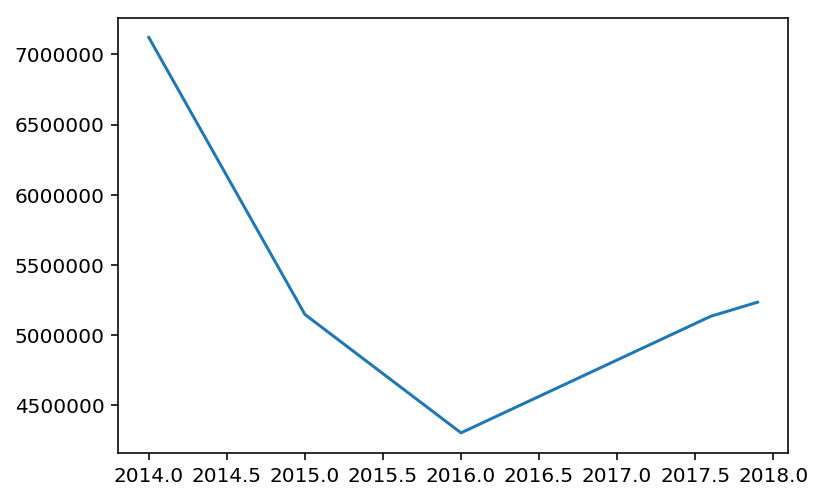

In [41]:
plt.plot(import_sales_percent)

## 进口口岸

In [46]:
china_import_ports = ['大连新港', '上海港', '天津新港', '广州黄埔港', '内蒙古满洲里', '深圳皇岗口岸', '新疆阿拉山口口岸', '广西钦州保税港区', '福州港江阴港区', '张家界保税港区', '北京首都国际机场口岸', '青岛前湾保税港区', '宁波梅山保税港区', '重庆铁路口岸', '郑州铁路口岸', '广州港南沙港区', '海口港', '岳阳城陵矶港', '新疆霍尔果斯口岸', '成都铁路口岸', '深圳大铲湾海运港区', '西安铁路口岸', '唐山港区', '绥芬河铁路口岸', '安庆港', '厦门海沧保税港区', '武汉铁路口岸', '银川河东机场航空口岸']

In [87]:
china_import_ports

['大连新港',
 '上海港',
 '天津新港',
 '广州黄埔港',
 '内蒙古满洲里',
 '深圳皇岗口岸',
 '新疆阿拉山口口岸',
 '广西钦州保税港区',
 '福州港江阴港区',
 '张家界保税港区',
 '北京首都国际机场口岸',
 '青岛前湾保税港区',
 '宁波梅山保税港区',
 '重庆铁路口岸',
 '郑州铁路口岸',
 '广州港南沙港区',
 '海口港',
 '岳阳城陵矶港',
 '新疆霍尔果斯口岸',
 '成都铁路口岸',
 '深圳大铲湾海运港区',
 '西安铁路口岸',
 '唐山港区',
 '绥芬河铁路口岸',
 '安庆港',
 '厦门海沧保税港区',
 '武汉铁路口岸',
 '银川河东机场航空口岸']

### 平行进口汽车试点企业

In [83]:
shanghai_parallel_import_cars_company_str = '上海智联汽车销售服务有限公司、上海外高桥汽车交易市场有限公司、上海沪尊荣汽车有限公司、上海汽车进出口有限公司、中航兰田汽车销售服务（上海）有限公司、上海亚耘国际贸易有限公司、誉哲汽车销售（上海）有限公司、上海紫平国际贸易有限公司、天际线（上海）汽车有限公司、上海均瑶汽车贸易有限公司、凯霆新能源汽车（上海）有限公司、上海远方环球国际贸易有限公司、上海永达汽车、上海百联汽车、宝信汽车、上海汽车进出口有限公司、上海均瑶集团、润东汽车、上海紫平国际贸易有限公司、上海外高桥汽车交易市场'

In [84]:
shanghai_parallel_import_cars_company_list = shanghai_parallel_import_cars_company_str.split('、')

In [85]:
shanghai_parallel_import_cars_company_list

['上海智联汽车销售服务有限公司',
 '上海外高桥汽车交易市场有限公司',
 '上海沪尊荣汽车有限公司',
 '上海汽车进出口有限公司',
 '中航兰田汽车销售服务（上海）有限公司',
 '上海亚耘国际贸易有限公司',
 '誉哲汽车销售（上海）有限公司',
 '上海紫平国际贸易有限公司',
 '天际线（上海）汽车有限公司',
 '上海均瑶汽车贸易有限公司',
 '凯霆新能源汽车（上海）有限公司',
 '上海远方环球国际贸易有限公司',
 '上海永达汽车',
 '上海百联汽车',
 '宝信汽车',
 '上海汽车进出口有限公司',
 '上海均瑶集团',
 '润东汽车',
 '上海紫平国际贸易有限公司',
 '上海外高桥汽车交易市场']

In [86]:
len(shanghai_parallel_import_cars_company_list)

20

2016年,天津试点企业累计进口平行车5.3万辆,进口额27.4亿美元,分别占全国个自贸试验区试点企业进口数的81.5%和82.5%. 全国进口额Top10的试点企业中9家为天津企业, Top20中17家为天津企业.

2016年,全国平行进口132,877辆汽车,同比增长16.3%, 占比12.8%. Top7为丰田,路虎,奔驰,宝马,福特,日产,奥迪,份额达到96%, 其中丰田占比50%.